<a href="https://colab.research.google.com/github/kghilothia06/customer_analysis/blob/master/grid_search_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing python libraries

In [0]:
import numpy as np #for numerical computations
import pandas as pd #for reading the dataset
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for interactive visualizations

Importing the dataset

In [0]:
dataset = pd.read_excel('/content/Customers2.xlsx')

# exploring the dataset

In [4]:
dataset.info

<bound method DataFrame.info of      CustomerID  NumCalls  NumEmails  ...  PageVisits  PriorClient  MadeAPurchase
0             1        33         19  ...         0.0          Yes             No
1             2         0          1  ...         0.0           No             No
2             3         4          6  ...         0.0           No             No
3             4         0         10  ...         0.0           No             No
4             5         7          0  ...         0.0           No            Yes
..          ...       ...        ...  ...         ...          ...            ...
748         749         3          0  ...         0.0           No            Yes
749         750         0          4  ...         0.0           No            Yes
750         751        15          0  ...         0.0           No            Yes
751         752         0          1  ...         0.0          Yes            Yes
752         753        20          0  ...         0.0          Yes

In [5]:
dataset.shape

(753, 12)

In [6]:
#getting top 10 entries in dataset
dataset.head(10)

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,1,33,19,1,0,1,German,Germany,10.0,0.0,Yes,No
1,2,0,1,0,1,0,English,USA,61.0,0.0,No,No
2,3,4,6,2,0,0,Spanish,Mexico,1.0,0.0,No,No
3,4,0,10,0,0,1,English,India,26.0,0.0,No,No
4,5,7,0,0,0,0,English,USA,11.0,0.0,No,Yes
5,6,10,1,0,1,0,English,USA,30.0,0.0,Yes,No
6,7,5,0,0,0,0,English,USA,10.0,0.0,No,No
7,8,1,0,0,0,0,English,USA,4.0,0.0,No,No
8,9,26,0,0,0,0,English,India,15.0,0.0,No,Yes
9,10,11,0,0,0,0,Spanish,Spain,15.0,0.0,Yes,Yes


In [7]:
#getting last 10 entries in dataset
dataset.tail(10)

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
743,744,0,0,1,2,0,Japanese,Japan,0.0,0.0,Yes,No
744,745,10,0,0,0,0,English,USA,0.0,0.0,No,Yes
745,746,0,1,0,0,0,English,France,0.0,0.0,Yes,Yes
746,747,9,1,0,0,0,English,USA,0.0,1.0,No,Yes
747,748,27,0,0,0,0,English,USA,0.0,0.0,No,Yes
748,749,3,0,0,0,0,German,Canada,0.0,0.0,No,Yes
749,750,0,4,0,0,0,German,Canada,0.0,0.0,No,Yes
750,751,15,0,0,0,0,English,India,0.0,0.0,No,Yes
751,752,0,1,0,0,0,Spanish,Colombia,0.0,0.0,Yes,Yes
752,753,20,0,0,0,0,German,Switzerland,0.0,0.0,Yes,Yes


In [8]:
dataset.describe

<bound method NDFrame.describe of      CustomerID  NumCalls  NumEmails  ...  PageVisits  PriorClient  MadeAPurchase
0             1        33         19  ...         0.0          Yes             No
1             2         0          1  ...         0.0           No             No
2             3         4          6  ...         0.0           No             No
3             4         0         10  ...         0.0           No             No
4             5         7          0  ...         0.0           No            Yes
..          ...       ...        ...  ...         ...          ...            ...
748         749         3          0  ...         0.0           No            Yes
749         750         0          4  ...         0.0           No            Yes
750         751        15          0  ...         0.0           No            Yes
751         752         0          1  ...         0.0          Yes            Yes
752         753        20          0  ...         0.0          Y

In [0]:
#checking for missing/null values
null_columns=dataset.columns[dataset.isnull().any()]
#taking care of null values
dataset.fillna(0,inplace=True)


# Data Preprocessing & Visualization

plotting histogram of frequency of 'NumCalls' column with range (0-19) (20-39) and so on



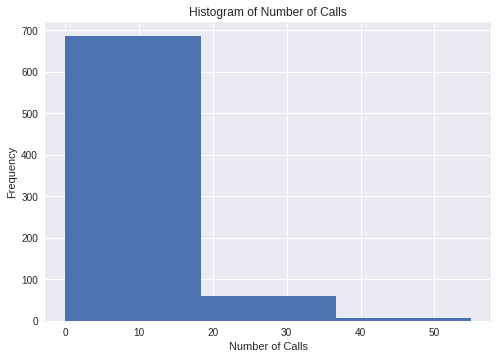

In [10]:
plt.style.use('seaborn')
plt.hist(dataset['NumCalls'] , bins=3)
plt.xlabel('Number of Calls')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Calls')
plt.show()

plotting a bar graph of 'Country' column

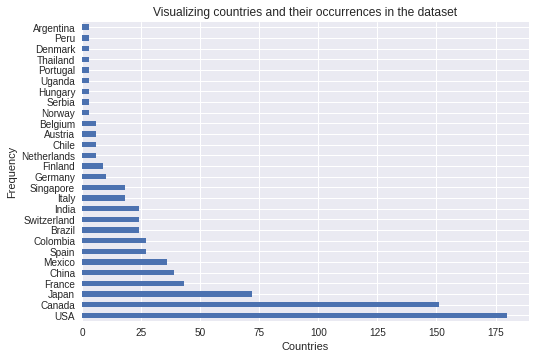

In [11]:
dataset['Country'].value_counts().plot(kind='barh')
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.title('Visualizing countries and their occurrences in the dataset')
plt.show()

adding a new column 'TotalInteractions' to the dataset that contains sum of the columns NumCalls, NumEmails, NumDownloads, NumEvents, and NumForms

In [0]:
dataset['TotalInteractions'] = dataset['NumCalls'] + dataset['NumEmails'] + dataset['NumDownloads'] + dataset['NumEvents'] + dataset['NumForms']

In [13]:
dataset.shape

(753, 13)

In [0]:
#rearranging the columns
mid = dataset['TotalInteractions']
dataset.drop(labels=['TotalInteractions'], axis=1, inplace = True)
dataset.insert(6, 'TotalInteractions', mid)

In [15]:
dataset.head(5)

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,TotalInteractions,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,1,33,19,1,0,1,54,German,Germany,10.0,0.0,Yes,No
1,2,0,1,0,1,0,2,English,USA,61.0,0.0,No,No
2,3,4,6,2,0,0,12,Spanish,Mexico,1.0,0.0,No,No
3,4,0,10,0,0,1,11,English,India,26.0,0.0,No,No
4,5,7,0,0,0,0,7,English,USA,11.0,0.0,No,Yes


Modifying the 'Country' column

In [0]:
#first we create dummy variables
top = ['USA', 'China', 'Japan', 'France', 'Canada']
dataset['Country'] = dataset['Country'].apply(lambda x : 'Other' if x not in top else x)
df1 = pd.get_dummies(dataset['Country'])

In [17]:
dataset['Country'].value_counts()

Other     268
USA       180
Canada    151
Japan      72
France     43
China      39
Name: Country, dtype: int64

In [0]:
#merging dataset and df1
dataset =pd.concat([dataset,df1],axis=1)

In [0]:
#we dont need 'Country' column anymore, hence we drop it
dataset.drop(['Country'],axis=1,inplace=True)

In [20]:
dataset.head(5)

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,TotalInteractions,Language,WebVisits,PageVisits,PriorClient,MadeAPurchase,Canada,China,France,Japan,Other,USA
0,1,33,19,1,0,1,54,German,10.0,0.0,Yes,No,0,0,0,0,1,0
1,2,0,1,0,1,0,2,English,61.0,0.0,No,No,0,0,0,0,0,1
2,3,4,6,2,0,0,12,Spanish,1.0,0.0,No,No,0,0,0,0,1,0
3,4,0,10,0,0,1,11,English,26.0,0.0,No,No,0,0,0,0,1,0
4,5,7,0,0,0,0,7,English,11.0,0.0,No,Yes,0,0,0,0,0,1


Now, we perform label encoding on 'PriorClient' and 'MadeAPurchase' Column

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['PriorClient'] = le.fit_transform(dataset['PriorClient'])
dataset['MadeAPurchase'] = le.fit_transform(dataset['MadeAPurchase'])

In [22]:
dataset.shape

(753, 18)

# Preparing Training and Validation Sets 

The columns for our interest for preparing X(input features) are :
TotalInteractions
WebVisits
PageVisits
PriorClient
dummy variables of 'Country' and 'Language' columns

The column for y(output vector) is :
MadeAPurchase

In [0]:
X = dataset.iloc[:, [6,8,9,10,12,13,14,15,16,17]].values
y = dataset.iloc[:, 11].values

In [24]:
X.shape

(753, 10)

In [25]:
y.shape

(753,)

In [0]:
# Splitting the dataset into the Training set and validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
X_train.shape

(602, 10)

In [28]:
y_train.shape

(602,)

In [29]:
X_val.shape

(151, 10)

In [30]:
y_val.shape

(151,)

# Model Training 

we implement SVM classifier from the sklearn library for our dataset

In [31]:
#applying SVM
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear') 

#Train the model using the training sets
clf.fit(X, y)

cross_val_score(clf,X,y,scoring='accuracy',cv=5).mean()

0.7211920529801324

In [32]:
import multiprocessing
cpus = multiprocessing.cpu_count()
cpus

2

# Performing Grid Search

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
params = [
    {
        'kernel' : ['linear' , 'rbf' , 'poly' , 'sigmoid'],
        'C' : [ 0.1 ,0.2 , 0.5 , 1.0 ,2.0 ,5.0]
        
    }
    
]

In [0]:
#making a grid search object
gs = GridSearchCV(estimator=svm.SVC() , param_grid=params , scoring='accuracy' , cv=5 , n_jobs=cpus)

In [43]:
#fitting gs to our dataset
gs.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'C': [0.1, 0.2, 0.5, 1.0, 2.0, 5.0],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [44]:
gs.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
gs.best_score_

0.7211920529801324